In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from collections import defaultdict

info_path = '/opt/ml/level2_cv_semanticsegmentation-cv-01/output/hrnet_48w_ocr_1024_cosAnn_best0_full.csv'

In [2]:
def decode_rle_to_mask(rle, height, width):
    s = rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(height * width, dtype=np.uint8)
    
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    
    return img.reshape(height, width)

PALETTE = [
    (220, 20, 60), (119, 11, 32), (0, 0, 142), (0, 0, 230), (106, 0, 228),
    (0, 60, 100), (0, 80, 100), (0, 0, 70), (0, 0, 192), (250, 170, 30),
    (100, 170, 30), (220, 220, 0), (175, 116, 175), (250, 0, 30), (165, 42, 42),
    (255, 77, 255), (0, 226, 252), (182, 182, 255), (0, 82, 0), (120, 166, 157),
    (110, 76, 0), (174, 57, 255), (199, 100, 0), (72, 0, 118), (255, 179, 240),
    (0, 125, 92), (209, 0, 151), (188, 208, 182), (0, 220, 176),
]
CLASSES = [
    'finger-1', 'finger-2', 'finger-3', 'finger-4', 'finger-5',
    'finger-6', 'finger-7', 'finger-8', 'finger-9', 'finger-10',
    'finger-11', 'finger-12', 'finger-13', 'finger-14', 'finger-15',
    'finger-16', 'finger-17', 'finger-18', 'finger-19', 'Trapezium',
    'Trapezoid', 'Capitate', 'Hamate', 'Scaphoid', 'Lunate',
    'Triquetrum', 'Pisiform', 'Radius', 'Ulna',
]
def label2rgb(label):
    image_size = label.shape[1:] + (3, )
    image = np.zeros(image_size, dtype=np.uint8)
    
    for i, class_label in enumerate(label):
        image[class_label == 1] = PALETTE[i]
        
    return image

In [3]:
df = pd.read_csv(info_path)
image_info = defaultdict(dict)
image_names = list(set(df['image_name']))
for image_name, class_name, rle in zip(df['image_name'], df['class'], df['rle']):
    image_info[image_name][class_name] = rle

In [4]:
base_path = '/opt/ml/level2_cv_semanticsegmentation-cv-01/data/test/DCM'
i = 0

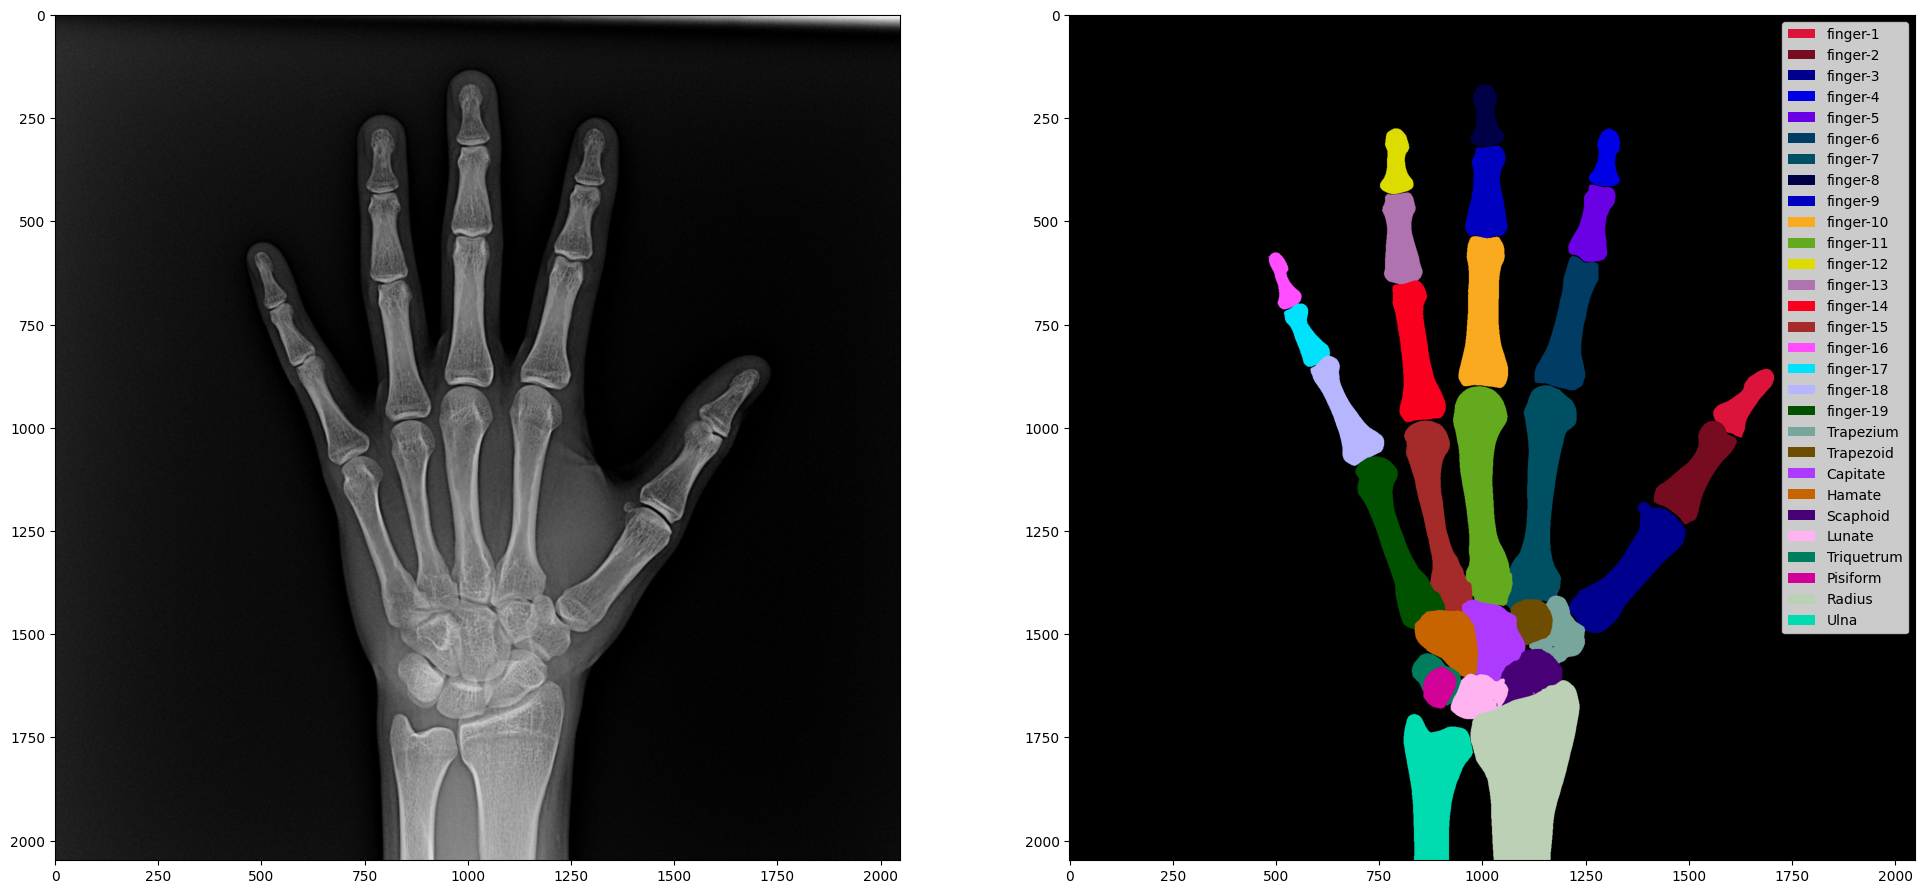

In [5]:
image = cv2.imread(os.path.join(base_path, image_names[i]))

preds = []
for class_name, rle in image_info[image_names[i]].items():
    pred = decode_rle_to_mask(rle, height=2048, width=2048)
    preds.append(pred)

preds = np.stack(preds, 0)

fig, ax = plt.subplots(1, 2, figsize=(24, 12))
ax[0].imshow(image)
ax[1].imshow(label2rgb(preds))

legend_elements = [Patch(facecolor=[c / 255 for c in color], label=CLASSES[i]) for i, color in enumerate(PALETTE)]
plt.legend(handles=legend_elements)
plt.show()
i += 1